# Image Processing Assignment 4

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
def detectAndDescribe(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    surf = cv2.xfeatures2d.SURF_create()
    kp, des = surf.detectAndCompute(image, None)
    return kp, des

In [3]:
def right_matches(des1, des2):
    matcher = cv2.DescriptorMatcher_create("BruteForce")
    matches = matcher.knnMatch(des1, des2, 2)
    right = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            right.append(m)
    return right

In [4]:
def match(image1, image2, min_count = 50):
    kp1, des1 = detectAndDescribe(image1)
    kp2, des2 = detectAndDescribe(image2)
    right = right_matches(des1, des2)
    M = None
    if len(right) > min_count:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in right ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in right ]).reshape(-1,1,2)
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()
        h,w,d = image1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)
        image2 = cv2.polylines(image2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
    else:
        print ("They aren't the same place")
        matchesMask = None
    draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = None,
                   matchesMask = matchesMask,
                   flags = 2)
    image = cv2.drawMatches(image1,kp1,image2,kp2,right,None,**draw_params)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB)),plt.show()
    return M

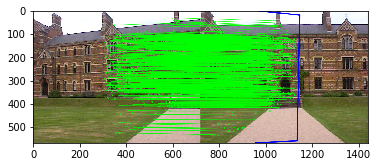

In [5]:
img1 = cv2.imread('keble_a.jpg')
img2 = cv2.imread('keble_b.jpg')

M = match(img1, img2)

In [6]:
def stitch(img2, img1):
    H = match(img1, img2)    
    result = cv2.warpPerspective(img1, H, (img1.shape[1] + img2.shape[1], img1.shape[0]))
    result[0:img2.shape[0], 0:img2.shape[1]] = img2
    return result

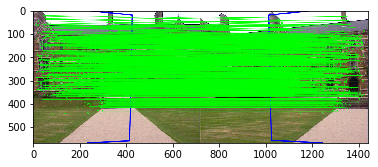

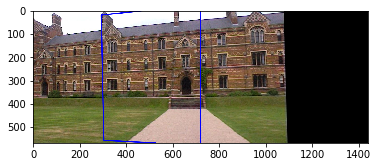

In [7]:
result = stitch(img1, img2)
plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))

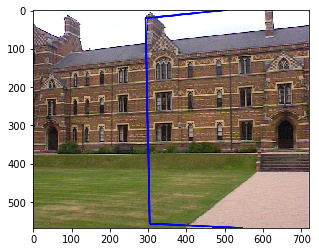

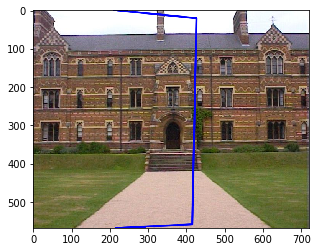

In [8]:
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
img = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()